In [3]:
import essentia
import math
from essentia import *

import essentia.standard as std
import IPython.display as ipd
import scipy.io.wavfile as wav
import numpy as np
import matplotlib.pyplot as plt

import librosa
import scipy
from scipy import spatial, signal 

In [207]:
def buscar_frecuencia(texto):
    frecuencias = [20, 30, 40, 60, 80, 120, 160, 240, 320, 480, 640, 960, 1280, 1920, 2560, 3840, 5120, 7680, 10240, 15360, 20480]
    voltajes = [0.0, 0.5, 1.0, 1.5, 2.0, 2.5, 3.0, 3.5, 4.0, 4.5, 5.0, 5.5, 6.0, 6.5, 7.0, 7.5, 8.0, 8.5, 9.0, 9.5, 10.0]
    for i, voltaje in enumerate(voltajes):
        if str(voltaje) in texto:
            return frecuencias[i]
    return None


def similitud_coseno_MFCC(original, remake):
    original_mfcc = librosa.feature.mfcc(y=original,sr=sampleRate)
    syntesis_mfcc = librosa.feature.mfcc(y=remake,sr=sampleRate)

    n = syntesis_mfcc.shape[1]
    coss_sim = np.zeros(n)

    for i in range(n):
        original = original_mfcc[1:, i]
        syntesis = syntesis_mfcc[1:, i]
        coss_sim[i] = 1 - spatial.distance.cosine(original, syntesis)


    similitud_value = np.round(np.mean(coss_sim),4)
          
    return similitud_value

def cut_audio_one_period(audio, sampleRate):
    
    freq_fund_teorica = buscar_frecuencia(file_name)
    
    # Realizar la transformada de Fourier
    fft = np.fft.fft(audio)

    # Obtener la amplitud de la transformada
    magnitude = np.abs(fft)

    # Obtener las frecuencias correspondientes
    frequencies = np.fft.fftfreq(len(audio), 1/sampleRate)

    # Encontrar la frecuencia fundamental
    print(np.max(magnitude))
    for i in range(len(magnitude)):
        if magnitude[i]>80:
            freq_fund_calculada = np.abs(frequencies[i])
            break
#     print('Frequencia fund. del señal calculada: ' + str(freq_fund_calculada))
#     print('Frequencia fund. del señal según la tabla: ' + str(freq_fund_teorica))
    
    #Esta forma no siempre funciona ya que la frec. fundamental puede tenr un harmonico de mayor magnitud que ella misma
    # fundamental_freq = np.abs(frequencies[np.argmax(magnitude)])

    # calcular la duración de un periodo en SEGUNDOS i SAMPLES
    period = np.abs(1/freq_fund_teorica)
    period_samples = int(period*sampleRate)
    print('Period Samples: ' + str(period_samples))

    # Calcular el número de períodos actuales en el audio
    num_periods = int(len(audio) / period_samples)
    
    #obtener versión del audio de solo 1 periodo
    audio_cut = audio[15:period_samples+15]
    
    return audio_cut, num_periods, period



def remake_audio_frome_period(audio_cut, num_periods):

    # Alargar el audio utilizando la función numpy.tile
    audio_remake = np.tile(audio_cut, int(num_periods))
    
    return audio_remake, audio



No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


1780.4167977565396
Period Samples: 34


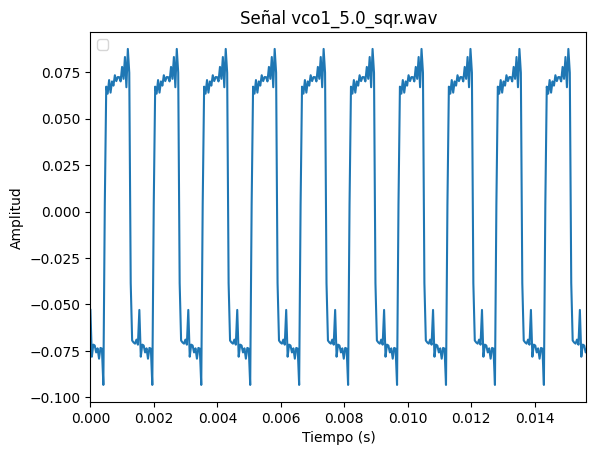

Similitud coseno entre MFCC, media = 0.9272


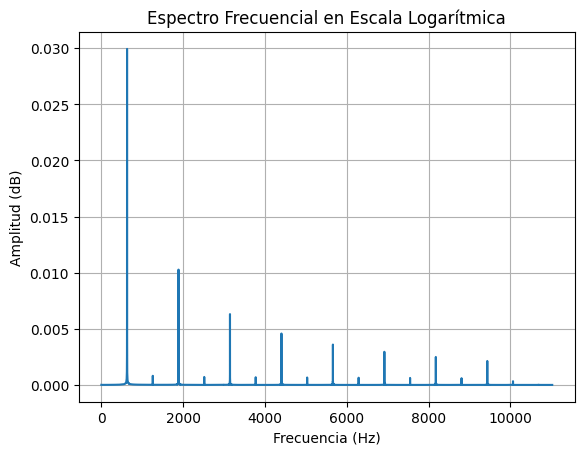

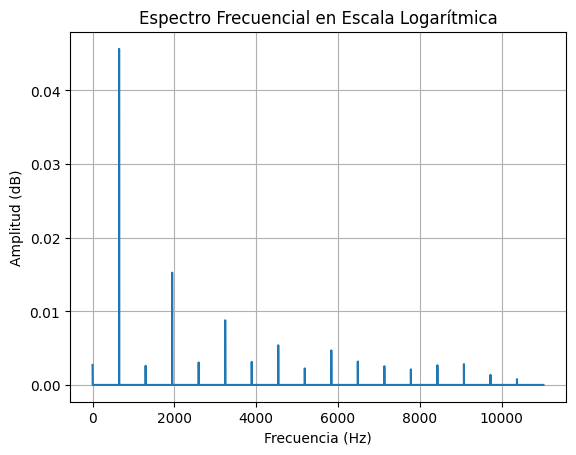

In [206]:
# input_file = '/mnt/c/Users/bosco/Desktop/TFG/TFG-Kobol-BoscoOlives/rsf_kobol_expander_2-vco/audio/vco1/square/vco1_10.0_sqr.wav'
input_file = '/mnt/c/Users/bosco/Desktop/TFG/TFG-Kobol-BoscoOlives/rsf_kobol_expander_2-vco/audio/vco1/square/vco1_5.0_sqr.wav'

file_name = input_file.split("/")[-1]


audio, sampleRate = librosa.load(input_file)

audio_cut, num_periods, period = cut_audio_one_period(audio, sampleRate)
audio_remake, audio = remake_audio_frome_period(audio_cut, num_periods)


# Calcular la duración total de la señal
total_time = len(audio_remake) / sampleRate

# Definir los límites del eje x como un rango que cubra 4 veces el período
x_lim = [0, 10 * period]

# Realizar el plot de la señal
plt.plot(np.arange(len(audio_remake)) / sampleRate, audio_remake)
plt.xlabel('Tiempo (s)')
plt.ylabel('Amplitud')
plt.title('Señal ' + file_name)
# plt.axvline(x=period*5, color='r', linestyle='--', label='Periodo estimado ')
# period_theoric = 1/freq_fund_teorica


# plt.axvline(x=period_theoric, color='g', linestyle='--', label='Periodo teórico')

plt.legend()
plt.xlim(x_lim)
plt.show()


# Ejemplo de como visualizar  el espectro y marcar la freq. fundamental

# Plot del espectro de frecuencias
# plt.plot(frequencies[:len(frequencies)//2], 20 * np.log10(magnitude[:len(magnitude)//2]))
# plt.xlabel("Frecuencia (Hz)")
# plt.ylabel("Amplitud (dB)")
# plt.xlim([0, sampleRate/2])
# plt.ylim([-60, 30])

# plt.axvline(x=freq_fund_calculada, color='r', linestyle='--', label='Frecuencia fundamental: ' + str(freq_fund_calculada))
# plt.legend()
# plt.show()



ipd.display(ipd.Audio(data=audio, rate=sampleRate))
ipd.display(ipd.Audio(data=audio_remake, rate=sampleRate))

similitud_value = similitud_coseno_MFCC(audio, audio_remake)
print("Similitud coseno entre MFCC, media = "+str(similitud_value))

def plot_espectro_log(audio, sr):
    n = len(audio)
    k = np.arange(n)
    T = n / sr
    frq = k / T # two sides frequency range
    frq = frq[:n//2] # one side frequency range

    Y = np.fft.fft(audio) / n # fft computing and normalization
    Y = Y[:n//2]

    plt.figure()
    plt.plot(frq, np.abs(Y)) # 20*log10(abs(y)) is the formula to convert amplitude to dB
    plt.title('Espectro Frecuencial en Escala Logarítmica')
    plt.xlabel('Frecuencia (Hz)')
    plt.ylabel('Amplitud (dB)')
    plt.grid()
    plt.show()

plot_espectro_log(audio, sampleRate)
plot_espectro_log(audio_remake, sampleRate)